<a href="https://colab.research.google.com/github/icemduru/Heart-Failure-Prediction-with-Machine-Learning/blob/main/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer




In [3]:
df = pd.read_csv("heart.csv")

In [4]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## ***Exploratory data analysis***

In [5]:
df.shape

(918, 12)

We have 918 observation, 11 features, and 1 output.

In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

No missing data !

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Maybe there is missing data. How are RestingBP and Cholesterol 0 (zero) ?


In [8]:
df[df["RestingBP"]==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


Yeap, patient number449 looks like missing those. Let's drop it.

In [9]:
df.drop(df.index[449], inplace=True)

In [10]:
df[df["Cholesterol"]==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


We are still missing Cholesterol for 171 patients. 171 patients is quite large portion of the data. I will try to impute the cholesterol columns and see what happens.

In [11]:
df["Cholesterol"] = df["Cholesterol"].replace({'0':np.nan, 0:np.nan})


In [12]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,746.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,244.635389,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,59.153524,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,207.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,275.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [13]:
categorical_cols = [cname for cname in df.columns if
                    df[cname].nunique() < 10 and 
                    df[cname].dtype == "object"]

In [14]:
categorical_cols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [15]:
numerical_cols = [cname for cname in df.columns if 
                df[cname].dtype in ['int64', 'float64']]

In [16]:
numerical_cols

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

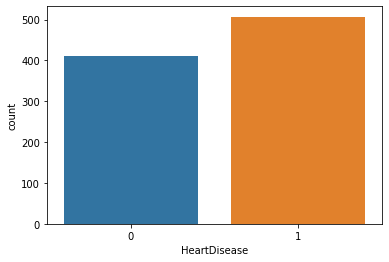

In [17]:
sns.countplot(data=df,x='HeartDisease')

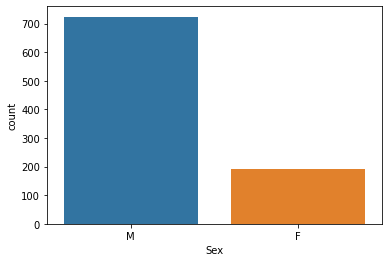

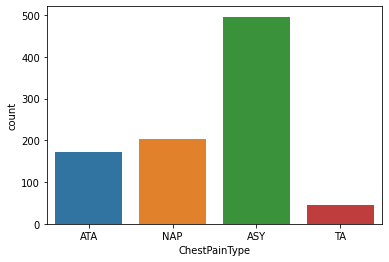

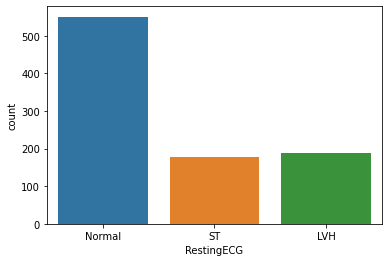

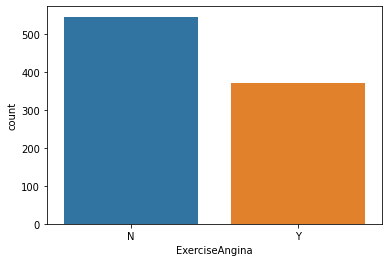

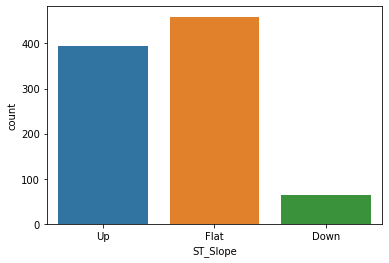

In [18]:
for i in categorical_cols:
  sns.countplot(data=df,x=i)
  plt.show()

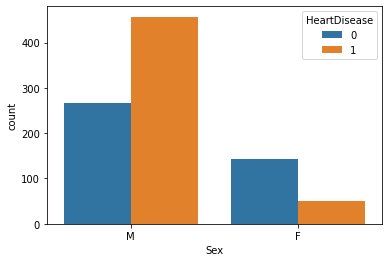

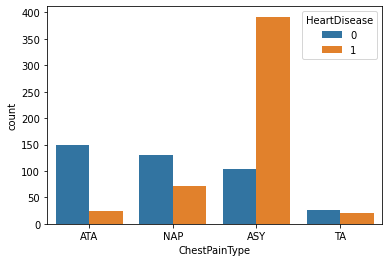

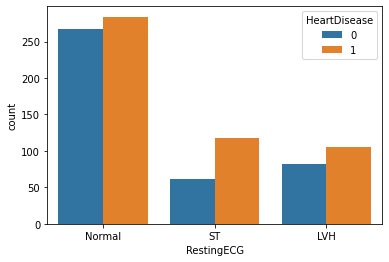

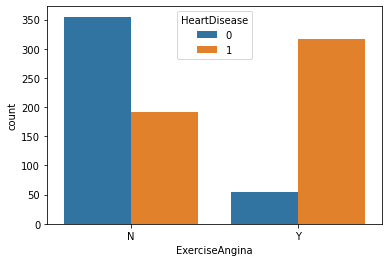

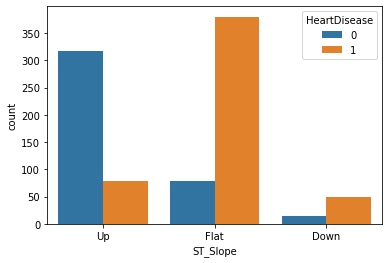

In [19]:
for i in categorical_cols:
  sns.countplot(data=df,x=i,hue="HeartDisease")
  plt.show()

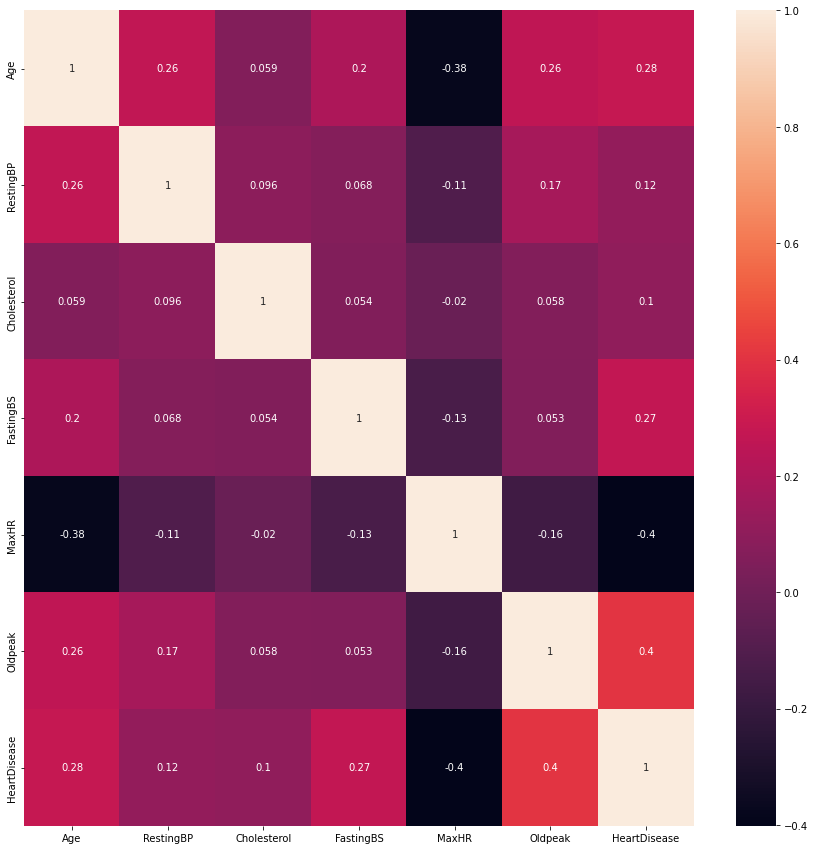

In [20]:
corr=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)

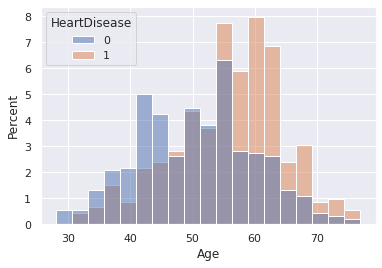

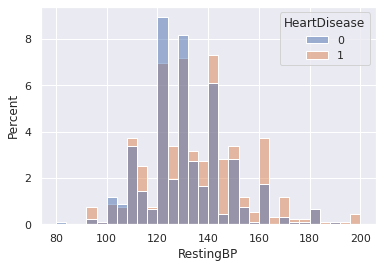

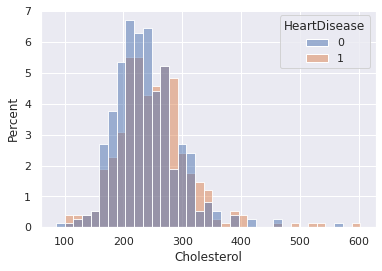

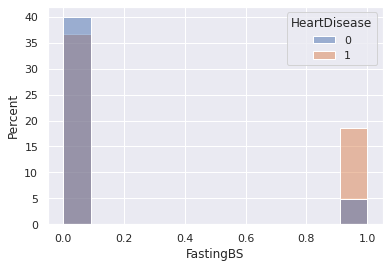

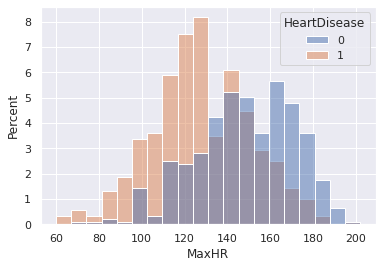

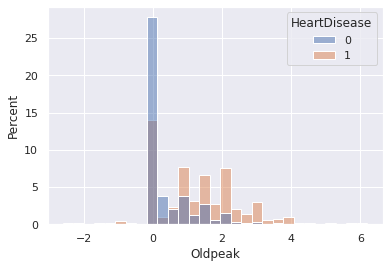

In [93]:
for i in numerical_cols[:-1]:
  sns.histplot(data=df,x=i,hue="HeartDisease",stat="percent")
  plt.show()

All numerical columns have more or less have an effect, the MaxHR and Oldpeak is the highest effective features

Unimodal data for age, restingBP, MaxHR.

Bimodal data for cholestrol and FastingBS.

- Normalization is needed for the data. Standardscaler should work.


# ***Prepare the data to create ml models***

In [21]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [22]:
X_train,X_valid,y_train,y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)

In [23]:
numerical_cols_x = numerical_cols[:-1]

In [24]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('normalize', StandardScaler())
])


categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [25]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols_x),
        ('cat', categorical_transformer, categorical_cols)
    ])

Let's try couple of different models.



*   RandomForest
*   Logistic Regression
*   Support Vector
*   KNeighbors
*   xgboost
*   Gaussian Naive Bytes Classifier










In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score

#ramdom forest
rf_model = Pipeline(steps=[('preprocessor', preprocessor),('model', RandomForestClassifier())])
#Logistic Regression
lg_model = Pipeline(steps=[('preprocessor', preprocessor),('model', LogisticRegression())])
#Support Vector Classification
sv_model = Pipeline(steps=[('preprocessor', preprocessor),('model', SVC())])
#KNeighbors
kn_model = Pipeline(steps=[('preprocessor', preprocessor),('model', KNeighborsClassifier())])
#xgboost
xg_model = Pipeline(steps=[('preprocessor', preprocessor),('model', xgb.XGBClassifier())])
#Gaussian Naive Bytes Classifier
gn_model = Pipeline(steps=[('preprocessor', preprocessor),('model', GaussianNB())])


models_all = [rf_model,lg_model,sv_model,kn_model,xg_model,gn_model]

In [27]:
for model in models_all:
  model.fit(X_train, y_train)
  cv_score = cross_val_score(model, X_train, y_train, cv=10).mean()
  print(cv_score)

0.8622732321362457
0.858034061458719
0.8704368752313958
0.8567382450944094
0.8623102554609403
0.8539614957423177


In [28]:
for model in models_all:
  model.fit(X_train, y_train)
  cv_score = cross_val_score(model, X_valid, y_valid, cv=10).mean()
  print(cv_score)

0.8467836257309941
0.8526315789473685
0.8526315789473685
0.8201754385964912
0.835672514619883
0.8251461988304094


It looks like all will perform pretty well. SVC has the highest score. I will continue with it and perform hyperparameter tuning

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
parameters= {'C': [1, 10],
             'kernel': ['linear', 'rbf', 'poly'],
             'degree':[3,4,5,6],
             'shrinking': [True,False],
             'tol': [1e-3,1e-4]}

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols_x),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_train_processed = preprocessor.fit_transform(X_train)
X_valid_processed = preprocessor.transform(X_valid)


grid = GridSearchCV(estimator=SVC(), param_grid=parameters, cv= 5)
grid.fit(X_train_processed, y_train)

#grid = Pipeline(steps=[('preprocessor', preprocessor),('gridmodel', GridSearchCV(SVC(),param_grid=parameters, cv= 5,refit=True))])
#grid.fit(X_train, y_train)

grid.best_params_

{'C': 1, 'degree': 3, 'kernel': 'rbf', 'shrinking': True, 'tol': 0.001}

In [31]:
best_sv_model = Pipeline(steps=[('preprocessor', preprocessor),('model', SVC(C= 1, degree= 3, kernel = 'rbf', shrinking = True, tol= 0.001))])
best_sv_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('normalize',
                                                                   StandardScaler())]),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'FastingBS',
                                                   'MaxHR', 'Oldpeak']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'ChestPainType',
                    

In [32]:
from sklearn.metrics import f1_score
preds = best_sv_model.predict(X_valid)
f1_score(y_valid, preds)

0.8815165876777251

In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

class_names = ['Healty', 'Disease',]
print(classification_report(y_valid, preds,target_names=class_names))

              precision    recall  f1-score   support

      Healty       0.88      0.80      0.84        82
     Disease       0.85      0.91      0.88       102

    accuracy                           0.86       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



Text(91.68, 0.5, 'Actual label')

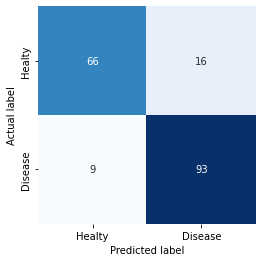

In [34]:
mat = confusion_matrix(y_valid, preds)
labels = class_names
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

We can predict hearth disease with f-score 0.88. It is pretty good.



```
# This is formatted as code
```

# ***Try deep learning***

In [35]:
model = keras.Sequential()
input_dimention= len(pd.DataFrame(X_train_processed).columns)
model.add(layers.Dense(384, activation='relu',input_dim=input_dimention))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(384, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(384, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 384)               8064      
                                                                 
 dropout (Dropout)           (None, 384)               0         
                                                                 
 dense_1 (Dense)             (None, 384)               147840    
                                                                 
 dropout_1 (Dropout)         (None, 384)               0         
                                                                 
 dense_2 (Dense)             (None, 384)               147840    
                                                                 
 dropout_2 (Dropout)         (None, 384)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [36]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
model.compile(
   optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [37]:
history = model.fit(X_train_processed,y_train,epochs=385,batch_size=16,callbacks=[es],validation_data=(X_valid_processed, y_valid))


Epoch 1/385
46/46 [==============================] - 2s 13ms/step - loss: 0.4189 - accuracy: 0.8240 - val_loss: 0.3782 - val_accuracy: 0.8587
Epoch 2/385
46/46 [==============================] - 0s 8ms/step - loss: 0.3477 - accuracy: 0.8608 - val_loss: 0.3274 - val_accuracy: 0.8587
Epoch 3/385
46/46 [==============================] - 0s 7ms/step - loss: 0.3209 - accuracy: 0.8663 - val_loss: 0.3382 - val_accuracy: 0.8533
Epoch 4/385
46/46 [==============================] - 0s 8ms/step - loss: 0.3073 - accuracy: 0.8840 - val_loss: 0.3282 - val_accuracy: 0.8478
Epoch 5/385
46/46 [==============================] - 0s 9ms/step - loss: 0.2857 - accuracy: 0.8840 - val_loss: 0.3155 - val_accuracy: 0.8750
Epoch 6/385
46/46 [==============================] - 0s 8ms/step - loss: 0.2628 - accuracy: 0.8950 - val_loss: 0.3452 - val_accuracy: 0.8587
Epoch 7/385
46/46 [==============================] - 0s 8ms/step - loss: 0.2475 - accuracy: 0.8977 - val_loss: 0.3661 - val_accuracy: 0.8533
Epoch 8/385


[]

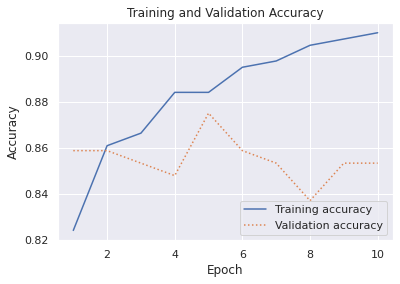

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
 
acc = history.history['accuracy']
val = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()


Try to tune the model

In [40]:
!pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 6.7 MB/s 


In [41]:
import keras_tuner as kt


In [42]:
def model_builder(hp):
  model = keras.Sequential()
  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=64, max_value=512, step=32)
  hp_units2 = hp.Int('units2', min_value=64, max_value=512, step=32)
  hp_units3 = hp.Int('units3', min_value=64, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu',input_dim=input_dimention))
  # Add next layers
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(units=hp_units2, activation='relu'))
  model.add(keras.layers.Dropout(0.1))
  model.add(keras.layers.Dense(units=hp_units3, activation='relu'))
  model.add(keras.layers.Dropout(0.3))
  #outlayer
  model.add(layers.Dense(1,activation="sigmoid"))
  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])
  model.compile(tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss="binary_crossentropy",
                metrics=['accuracy'])
  return model

In [43]:
tuner = kt.Hyperband(
    model_builder,
    objective='val_loss',
    directory="my_dir",
    max_epochs=10,
    factor=3,
    overwrite=True)

In [44]:
tuner.search(X_train_processed,y_train,epochs=32,batch_size=48,validation_data=(X_valid_processed, y_valid),callbacks=[stop_early])

Trial 30 Complete [00h 00m 03s]
val_loss: 0.3312818706035614

Best val_loss So Far: 0.3152708411216736
Total elapsed time: 00h 01m 14s
INFO:tensorflow:Oracle triggered exit


In [45]:
best_model = tuner.get_best_models()[0]


In [46]:
tuner.get_best_hyperparameters(num_trials=1)[0].get("learning_rate")


0.001

In [47]:
best_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               5376      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 448)               115136    
                                                                 
 dropout_1 (Dropout)         (None, 448)               0         
                                                                 
 dense_2 (Dense)             (None, 448)               201152    
                                                                 
 dropout_2 (Dropout)         (None, 448)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 4

In [48]:
eval_result = best_model.evaluate(X_valid_processed, y_valid)
print("[test loss, test accuracy]:", eval_result)

6/6 [==============================] - 0s 4ms/step - loss: 0.3153 - accuracy: 0.8641
[test loss, test accuracy]: [0.3152708411216736, 0.864130437374115]


In [49]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [50]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_processed, y_train,epochs=32,batch_size=48,validation_data=(X_valid_processed, y_valid))

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/32
16/16 [==============================] - 1s 22ms/step - loss: 0.4593 - accuracy: 0.7899 - val_loss: 0.3281 - val_accuracy: 0.8478
Epoch 2/32
16/16 [==============================] - 0s 11ms/step - loss: 0.3459 - accuracy: 0.8595 - val_loss: 0.3239 - val_accuracy: 0.8696
Epoch 3/32
16/16 [==============================] - 0s 11ms/step - loss: 0.3415 - accuracy: 0.8608 - val_loss: 0.3319 - val_accuracy: 0.8587
Epoch 4/32
16/16 [==============================] - 0s 11ms/step - loss: 0.3232 - accuracy: 0.8745 - val_loss: 0.3441 - val_accuracy: 0.8641
Epoch 5/32
16/16 [==============================] - 0s 11ms/step - loss: 0.3035 - accuracy: 0.8772 - val_loss: 0.3241 - val_accuracy: 0.8587
Epoch 6/32
16/16 [==============================] - 0s 11ms/step - loss: 0.2903 - accuracy: 0.8813 - val_loss: 0.3203 - val_accuracy: 0.8587
Epoch 7/32
16/16 [==============================] - 0s 10ms/step - loss: 0.2800 - accuracy: 0.8731 - val_loss: 0.3399 - val_accuracy: 0.8750
Epoch 8/32
16

In [51]:
hypermodel = tuner.hypermodel.build(best_hps)
hypermodel.fit(X_train_processed, y_train,epochs=best_epoch,batch_size=48,validation_data=(X_valid_processed, y_valid))

Epoch 1/10
16/16 [==============================] - 1s 21ms/step - loss: 0.4975 - accuracy: 0.7517 - val_loss: 0.3728 - val_accuracy: 0.8424
Epoch 2/10
16/16 [==============================] - 0s 11ms/step - loss: 0.3562 - accuracy: 0.8622 - val_loss: 0.3271 - val_accuracy: 0.8478
Epoch 3/10
16/16 [==============================] - 0s 11ms/step - loss: 0.3297 - accuracy: 0.8690 - val_loss: 0.3299 - val_accuracy: 0.8478
Epoch 4/10
16/16 [==============================] - 0s 11ms/step - loss: 0.3213 - accuracy: 0.8704 - val_loss: 0.3191 - val_accuracy: 0.8696
Epoch 5/10
16/16 [==============================] - 0s 10ms/step - loss: 0.3102 - accuracy: 0.8759 - val_loss: 0.3224 - val_accuracy: 0.8587
Epoch 6/10
16/16 [==============================] - 0s 10ms/step - loss: 0.3009 - accuracy: 0.8813 - val_loss: 0.3087 - val_accuracy: 0.8587
Epoch 7/10
16/16 [==============================] - 0s 11ms/step - loss: 0.2845 - accuracy: 0.8786 - val_loss: 0.3113 - val_accuracy: 0.8641
Epoch 8/10
16

In [52]:
loss, acc = hypermodel.evaluate(X_valid_processed, y_valid)
print()
print("loss:{}".format(loss))
print("accuracy:{}".format(acc))

6/6 [==============================] - 0s 5ms/step - loss: 0.3419 - accuracy: 0.8696

loss:0.34192466735839844
accuracy:0.8695651888847351


In [53]:
y_pred=hypermodel.predict(X_valid_processed)
#y_pred = np.argmax(y_pred, axis=1)
predicted_categories = [1 * (x[0]>=0.5) for x in y_pred]
class_names = ['Healty', 'Disease']
print(classification_report(y_valid, predicted_categories, target_names=class_names))

              precision    recall  f1-score   support

      Healty       0.85      0.85      0.85        82
     Disease       0.88      0.88      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



Deep learning did not increase our f1 score.

Text(89.18, 0.5, 'Actual label')

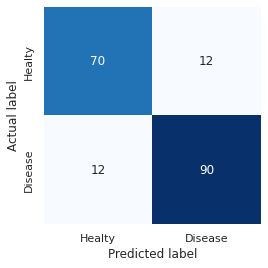

In [54]:
mat = confusion_matrix(y_valid, predicted_categories)
labels = class_names
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [55]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.1 MB/s 


In [69]:
numerical_cols_x

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [80]:
categorical_col_names_after_onehot = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out().tolist()

In [82]:
col_names = numerical_cols_x+categorical_col_names_after_onehot

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'Sex_F',
 'Sex_M',
 'ChestPainType_ASY',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'RestingECG_LVH',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_N',
 'ExerciseAngina_Y',
 'ST_Slope_Down',
 'ST_Slope_Flat',
 'ST_Slope_Up']

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


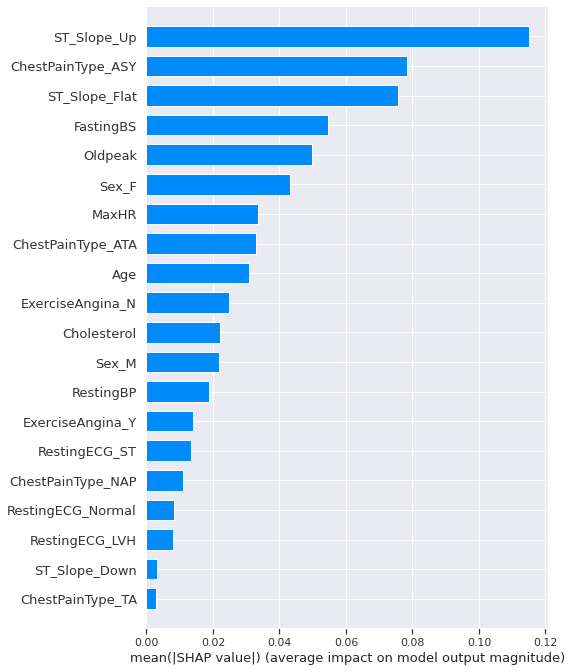

In [85]:
import shap
DE = shap.DeepExplainer(hypermodel, X_train_processed) 

shap_values = DE.shap_values(X_valid_processed, check_additivity=False) 
shap.initjs()
shap.summary_plot(
    shap_values[0], 
    X_valid_processed,
    feature_names=col_names,
    max_display=50,
    plot_type='bar')




It looks like, for our model, ST_slope, ChestPainType and FastingBS is the most important features.

This was also pretty clear in countplots and histograms.